In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [35]:
files = [file for file in os.listdir('./oneminutesjun21')]

julio = pd.DataFrame()
for file in files:
  df = pd.read_csv('./oneminutesjun21/'+file)
  julio = pd.concat([julio, df])

In [36]:
julio.head()

,TOA5,8543,CR1000X,8543.1,CR1000X.Std.03.02,CPU:Est_meteo1.CR1X,5308,OneMinute
0,TIMESTAMP,RECORD,Irradiance_Avg,T_amb_Avg,RH_Avg,P_atm_Avg,NaN,NaN
1,TS,RN,W/m^2,Deg C,%,mbar,NaN,NaN
2,NaN,NaN,Avg,Avg,Avg,Avg,NaN,NaN
3,2021-06-10 00:00:00,789544,0,15.29,64.78,755.6338,NaN,NaN
4,2021-06-10 00:01:00,789545,0,15.3,65.29,755.6088,NaN,NaN


# Arreglando la tabla

In [37]:
julio.drop(julio.index[0:3], axis = 0, inplace = True)
julio.drop(['OneMinute', '5308'],axis='columns', inplace=True)

# Convirtiendolo a float

In [38]:
julio = julio.astype({'CR1000X': float, '8543.1':float, 'CR1000X.Std.03.02':float, 'CPU:Est_meteo1.CR1X':float,'8543':float})

# Sacando promedios

In [39]:
prom_rad = julio['CR1000X'].mean()
prom_Tamb = julio['8543.1'].mean()
prom_atm = julio['CPU:Est_meteo1.CR1X'].mean()
proms_julio = [prom_rad, prom_Tamb,prom_atm]
julio.describe()

,8543,CR1000X,8543.1,CR1000X.Std.03.02,CPU:Est_meteo1.CR1X
count,43199.000000,43199.000000,43199.000000,43199.000000,43199.000000
mean,798184.000000,188.661017,15.993973,70.743681,753.016736
std,12470.621476,288.527946,2.892950,19.443184,1.327220
min,776585.000000,0.000000,11.530000,13.430000,668.532600
25%,787384.500000,0.000000,13.750000,57.485000,752.086600
50%,798184.000000,13.450000,15.280000,73.470000,753.069100
75%,808983.500000,297.200000,17.760000,85.800000,753.944650
max,819783.000000,1476.000000,25.960000,100.000000,756.367500


In [40]:
julio.to_csv('julio22.csv', index=False)
mes = 'julio'
anio = '2021'

# Radiacion julio

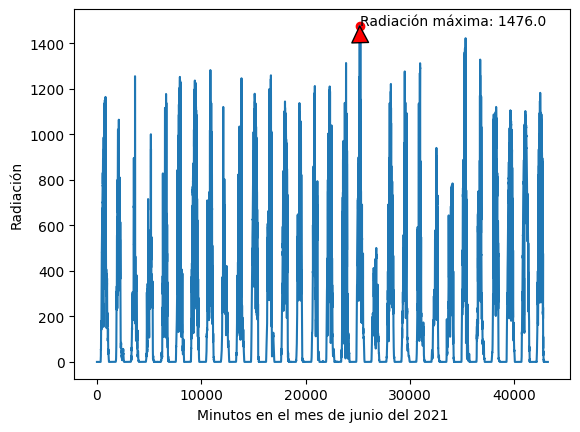

In [41]:
df = pd.read_csv("julio22.csv")

plt.plot(df.index, df['CR1000X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Radiación')
max_value = df['CR1000X'].max()
max_index = df['CR1000X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Radiación máxima: '+str(max_value), xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Temperatura Ambiente julio

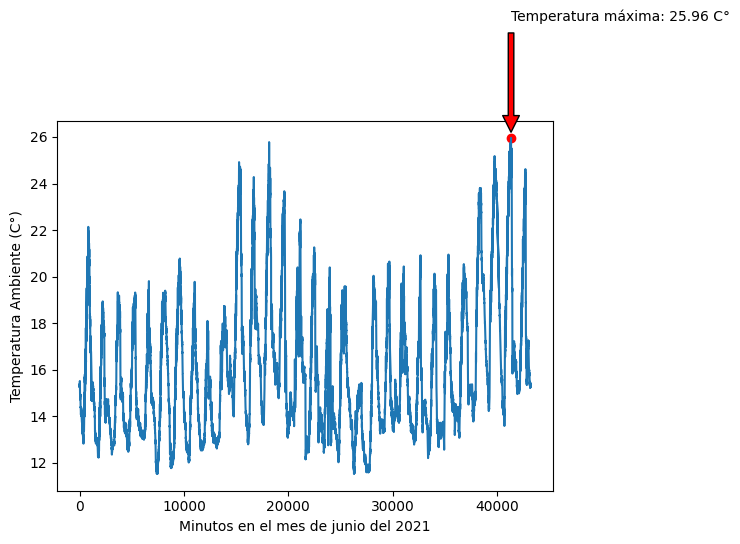

In [42]:

plt.plot(df.index, df['8543.1'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Temperatura Ambiente (C°)')
max_value = df['8543.1'].max()
max_index = df['8543.1'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Max Value')
plt.annotate('Temperatura máxima: '+str(max_value)+ ' C°', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# Presion julio

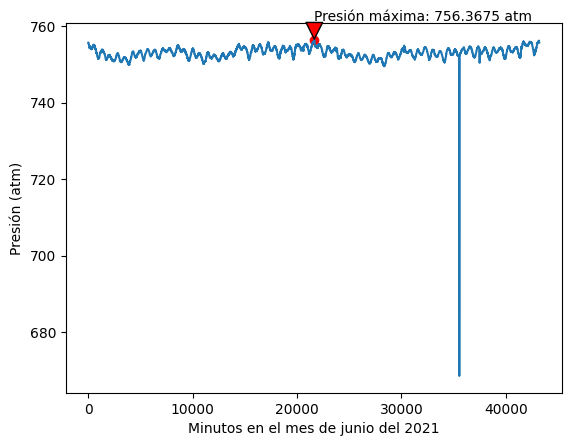

In [43]:

plt.plot(df.index, df['CPU:Est_meteo1.CR1X'])

plt.xlabel('Minutos en el mes de '+ mes + ' del ' + anio)
plt.ylabel('Presión (atm)')
max_value = df['CPU:Est_meteo1.CR1X'].max()
max_index = df['CPU:Est_meteo1.CR1X'].idxmax()
plt.scatter(x=max_index, y=max_value, color='r', label='Temperatura máxima')
plt.annotate('Presión máxima: '+str(max_value) + ' atm', xy=(max_index, max_value), xytext=(max_index+5, max_value+5),arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()